In [1]:
import collections
import networkx as nx
import sys
import os
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
graph_collections, graph_name = read_graph("./test-graphs")


{'ABILENE': {'index': 0, 'nodes': 11, 'edges': 14}, 'ABVT': {'index': 1, 'nodes': 23, 'edges': 31}, 'AGIS': {'index': 2, 'nodes': 25, 'edges': 30}, 'ARN.GRAPHML': {'index': 3, 'nodes': 30, 'edges': 29}, 'BELLCANADA': {'index': 4, 'nodes': 48, 'edges': 64}, 'BELLSOUTH.GRAPHML': {'index': 5, 'nodes': 51, 'edges': 66}, 'BICS.GRAPHML': {'index': 6, 'nodes': 33, 'edges': 48}, 'CERNET.GRAPHML': {'index': 7, 'nodes': 41, 'edges': 58}, 'CESNET200706.GRAPHML': {'index': 8, 'nodes': 44, 'edges': 51}, 'CHINANET.GRAPHML': {'index': 9, 'nodes': 42, 'edges': 66}, 'COGENTCO.GRAPHML': {'index': 10, 'nodes': 197, 'edges': 243}, 'COLT.GRAPHML': {'index': 11, 'nodes': 153, 'edges': 177}, 'DELTACOM.GRAPHML': {'index': 12, 'nodes': 113, 'edges': 161}, 'GARR201110.GRAPHML': {'index': 13, 'nodes': 59, 'edges': 74}, 'GEANT2001': {'index': 14, 'nodes': 27, 'edges': 38}, 'GRNET.GRAPHML': {'index': 15, 'nodes': 37, 'edges': 42}, 'INTELLIFIBER.GRAPHML': {'index': 16, 'nodes': 73, 'edges': 95}, 'INTEROUTE.GRAPHML'

In [3]:
# India   145nodes 187edges #37
# US carrier 158nodes   189edges # 41
# Kentucky    754nodes   895edges # 20
# Albeni  # 0
# Geant  2001 #14
# Bell Canada # 4
# Abvt # 1
# Agis # 2
# 10, 18, 8
# selection__= []
# selection__=[i for i,j in enumerate(graph_name)]
def selection__from_graph(graph_coll,graph_name_list,sel_=[]):
    """_summary_

    Args:
        graph_coll (_type_): _description_
        sel_ (list, optional): _description_. Defaults to [].

    Returns:
        _type_: _description_
    """
    if sel_ !=[]:
        return [(j, graph_coll[k]) for i, j in enumerate(graph_name_list)
                for k in sel_ if i == k]
    else:
        return [(i, j) for i, j in zip(graph_name_list, graph_coll)]


In [37]:
G = graph_collections[1]
# geo_loc_data = get_geo_data("Internet2LatLong.csv")
geo_loc_data = {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
                for (k, v) in G.nodes(data=True)}
# print(geo_loc_data)
edge_geo_data_combined = assign_location(G, geo_loc_data)
# set edge attributes
set_edge_attr(G, edge_geo_data_combined)
G.edges(data=True)


EdgeDataView([('0', '2', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 7.016}), ('0', '4', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 5.104}), ('0', '5', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 47.464}), ('0', '7', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 0.46}), ('1', '8', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 47.169}), ('1', '22', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 9.22}), ('1', '4', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 2.461}), ('1', '5', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 44.822}), ('1', '6', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 1.043}), ('2', '10', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, 'weight': 9.073}), ('2', '3', {'LinkLabel': 'Leased Wavelength/Managed Service', 'key': 0, '

In [5]:
selection__= [37,41,20,0,14,4,1,2,10, 18, 8]

gGrahps = selection__from_graph(graph_collections, graph_name, selection__)

# print(gGrahps)

geo_loc_data_sample = {i: {k: {"lat": v.get('Latitude', 0), "long": v.get('Longitude', 0)}
     for (k, v) in g.nodes(data=True)} for i, g in gGrahps}
# print(geo_loc_data_sample)

edge_geo_data_sample = {k: assign_location(u, v) for (k, v), (j,u) in zip(geo_loc_data_sample.items(), gGrahps)}
# print(geo_loc_data_sample)



# print()
# # edge_geo_data_combined_sample = {k: assign_location(g, v) for (k, v), g in zip(geo_loc_data_all.items(), graph_collections)}


In [6]:
node_strength_2_deg = [(i, sum(hub_information(G, i, 2))) 
                       for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
degree__ = [(i, len(n_neighbor(G, i, 1))) for (i, j) in sorted(list(G.degree()),
                                                               key=lambda item: int(item[0]))]


In [7]:

source_1, source_2, source_3, source_4, *others = degree__, node_strength_2_deg, eccentricity(G),  approximate_current_flow_betweenness_centrality(G, weight="weight"), current_flow_betweenness_centrality(G), betweenness_centrality(G, weight="weight"),  closeness_centrality(G),      load_centrality(
    G),    #eigenvector_centrality(G),

# print(source_2, source_3)


In [8]:
sources_of_evidences = {
    "Degree": {g[0]: [(i, len(n_neighbor(g[1], i, 1))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Node Strength": {g[0]: [(i, sum(hub_information(g[1], i, 2))) for (i, j) in sorted(list(g[1].degree()), key=lambda item: int(item[0]))] for g in gGrahps},
    "Eccentricity": {g[0]: eccentricity(g[1]) for g in gGrahps},
    "Approx Curr. Flow Betwns Cent'y": {g[0]: approximate_current_flow_betweenness_centrality(g[1]) for g in gGrahps}
}
# sources_of_evidences["Degree"]["ABILENE"]

In [9]:
e_v = 2
varying_examples_multi(source_1, source_2, source_3, source_4,e_v)

[('70', 0.9986942454915201),
 ('52', 0.7269206963021474),
 ('118', 0.6606933873804313),
 ('37', 0.04551598153655445)]

In [10]:
evis = [2,3,4]
selected_nodes_based_on_source ={i:{e: varying_examples_multi(sources_of_evidences["Degree"][i],
sources_of_evidences["Node Strength"][i], 
sources_of_evidences["Eccentricity"][i], 
    sources_of_evidences["Approx Curr. Flow Betwns Cent'y"][i], e) for e in evis} for i, j in gGrahps}

selected_nodes_based_on_source_ext = {k2:{k:len(v) for k,v in v2.items()} for k2,v2 in selected_nodes_based_on_source.items()}

# {i: { "#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "sel_":v} for (i,j), v in zip(gGrahps, selected_nodes_based_on_source.values())}
sel_node_summary={i: {"#Nodes":  nx.number_of_nodes(j), "#Edges": nx.number_of_edges(j), "Diameter":nx.diameter(j), "Density":nx.density(j)}for (i, j)in gGrahps }
sel_to_table = {
    i: (sel_node_summary[i] | selected_nodes_based_on_source_ext[i]) for i, j in gGrahps}
    


In [11]:
pd.DataFrame.from_dict(
    sel_to_table, orient='index')
# print()


,#Nodes,#Edges,Diameter,Density,2,3,4
ABILENE,11,14,5,0.254545,5,4,4
ABVT,23,31,7,0.122530,10,11,11
AGIS,25,30,7,0.100000,6,11,9
BELLCANADA,48,64,13,0.056738,11,16,18
CESNET200706.GRAPHML,44,51,6,0.053911,4,17,28
COGENTCO.GRAPHML,197,243,28,0.012587,8,21,29
GEANT2001,27,38,6,0.108262,5,19,19
ION.GRAPHML,125,146,25,0.018839,21,36,40
KDL,754,895,58,0.003153,47,178,175
TATANLD.GRAPHML,145,186,28,0.017816,4,122,7


In [12]:
clusters__ = {
    k2: {
        k: cluster_optimal_nodes_test(j, v) for k, v in v2.items()
        }  
        for (i, j), (k2, v2) in zip(
            tqdm(gGrahps), tqdm(selected_nodes_based_on_source.items())
            )
            }


 91%|█████████ | 10/11 [00:03<00:00,  2.52it/s]


In [13]:
# gGrahps[0][1]
cluster_optimal_nodes(gGrahps[0][1], selected_nodes_based_on_source["ABILENE"][2])


{'7': set(), '8': {'5'}, '9': {'0', '2'}, '10': {'1'}, '6': {'3', '4'}}

In [14]:
[{x:cluster_optimal_nodes_test(
    gGrahps[1][1], selected_nodes_based_on_source["ABILENE"][x])}for x in [2, 3, 4]]


[{2: {'7': {'0', '4', '6'},
   '8': {'1', '15', '16', '22', '5'},
   '9': {'12'},
   '10': {'11', '13', '14', '17', '18', '19', '2', '20', '21', '3'}}},
 {3: {'7': {'0', '6'},
   '1': {'11', '12', '15', '16', '17', '18', '21', '22', '4', '5', '8', '9'},
   '2': {'10', '13', '14', '19', '20', '3'}}},
 {4: {'7': {'0', '6'},
   '2': {'10', '13', '14', '17', '18', '19', '20', '3'},
   '1': {'11', '15', '16', '21', '22', '4', '8', '9'},
   '5': {'12'}}}]

In [15]:

clusters__dict = { c: {e: {i: set([i]) | j for i, j in f.items()} for e, f in d.items()} for c, d in clusters__.items()}

clusters__pair ={x: {e: {u: k for (k, v) in f.items() for u in v} for e, f in y.items()} for x, y in clusters__dict.items()}
# clusters__pair
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html



In [18]:
G = graph_collections[1]
__rand = nx.number_of_nodes(G)


In [19]:
clusters__pair
list(G.nodes().data())
# nx.set_node_attributes(G, kdl_cluster_2, k)
[nx.set_node_attributes(j, v2, str(k2)+" Sources") for (i,j), (k,v) in zip(gGrahps, clusters__pair.items()) for k2,v2 in v.items()]
print()

In [20]:
list(gGrahps[1][1].nodes().data())


[('0',
  {'Internal': 1,
   'Latitude': 38.89511,
   'Country': 'United States',
   'id': 0,
   'Longitude': -77.03637,
   'label': 'Washington CDC',
   '2 Sources': '0',
   '3 Sources': '5',
   '4 Sources': '5'}),
 ('1',
  {'Internal': 1,
   'Latitude': 40.71427,
   'Country': 'United States',
   'id': 1,
   'Longitude': -74.00597,
   'label': 'New York',
   '2 Sources': '1',
   '3 Sources': '1',
   '4 Sources': '1'}),
 ('2',
  {'Internal': 1,
   'Latitude': 33.749,
   'Country': 'United States',
   'id': 2,
   'Longitude': -84.38798,
   'label': 'Atlanta',
   '2 Sources': '0',
   '3 Sources': '10',
   '4 Sources': '10'}),
 ('3',
  {'Internal': 1,
   'Latitude': 25.77427,
   'Country': 'United States',
   'id': 3,
   'Longitude': -80.19366,
   'label': 'Miami',
   '2 Sources': '10',
   '3 Sources': '10',
   '4 Sources': '10'}),
 ('4',
  {'Internal': 1,
   'Latitude': 42.35843,
   'Country': 'United States',
   'id': 4,
   'Longitude': -71.05977,
   'label': 'Boston',
   '2 Sources': '

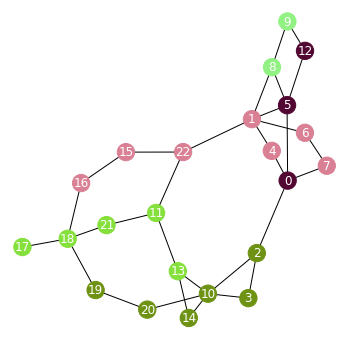

{'1': {'15', '6', '22', '4', '16', '7'}, '5': {'12', '0'}, '8': {'9'}, '11': {'13', '21', '17', '18'}, '10': {'14', '3', '2', '20', '19'}}
None


In [23]:
kdl_cluster_2 = clusters__pair["ABVT"][4]
nx.set_node_attributes(G, kdl_cluster_2, "2 Sources")
# print(list(G.nodes().data()))

opti_n_maps = {node: j['2 Sources'] for node, j in G.nodes().data()}
# print(opti_n_maps)

opti_n_maps_multi = {e:{node: {2:j['2 Sources'], 3:j['3 Sources'], 4:j['4 Sources']}
                      for node, j in f.nodes().data()} for (e, f) in gGrahps}
# print(opti_n_maps_multi)

# print(nx.number_of_nodes(G))
random_cols = color_generator(__rand)
# random_cols = {node:get_random_hex() for node in G.nodes()}
# print(random_cols)
{(k,v,k1,v1) for (k,v),(k1,v1) in zip(random_cols.items(),opti_n_maps.items())}
# values = [val_map.get(node, 0.25) for node in t.nodes()]
values = [random_cols.get(v, "#000000") for k, v in opti_n_maps.items() ]
#  node_color=values,
# print(values)
fig, ax = plt.subplots(1, figsize=(6, 6))
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
# ax.legend(scatterpoints=1)
plt.show()
print(print(cluster_optimal_nodes_test(
        gGrahps[1][1], selected_nodes_based_on_source["ABVT"][4]))
)


In [24]:
# [(node, data) for node, data in G.nodes(data=True)]
node_strength_2_deg = [(i, sum(hub_information(G, i, 2)))
                       for (i, j) in sorted(list(G.degree()), key=lambda item: int(item[0]))]
degree__ = [(i, len(n_neighbor(G, i, 1))) for (i, j) in sorted(list(G.degree()),
                                                               key=lambda item: int(item[0]))]


In [25]:
cluster_optimal_nodes_test(
    gGrahps[1][1], selected_nodes_based_on_source["ABVT"][4])


{'1': {'15', '16', '22', '4', '6', '7'},
 '5': {'0', '12'},
 '8': {'9'},
 '11': {'13', '17', '18', '21'},
 '10': {'14', '19', '2', '20', '3'}}

In [40]:
def hub_information(G, node, dist):
    """gets the sum of weigths of edges within a specified dist = 1, 2, 3, ...

    Args:
        G (graph): graph of networkx
        dist (int): lenght sought

    Returns:
        node_hub_information: dictionary of each node with corresponding nth length weight
    """
    node_information = n_neighbor(
        G, node, dist)
    # print("node_information: ", node_information)
    node_hub_information = [nx.shortest_path_length(
        G, node, k, weight='weight') for k in node_information]
    return node_hub_information


In [47]:
G = gGrahps[1][1] #graph_collections[1]
sample__ = cluster_optimal_nodes_test(G, selected_nodes_based_on_source["ABVT"][4])
sample__

{'1': {'15', '16', '22', '4', '6', '7'},
 '5': {'0', '12'},
 '8': {'9'},
 '11': {'13', '17', '18', '21'},
 '10': {'14', '19', '2', '20', '3'}}

In [68]:
[(i, sum(hub_information(G, i, 1)))
 for (i, j) in sample__.items()]

[{source:sum([nx.shortest_path_length(G, source, sub_target, weight='weight') for sub_target in target])} for source, target in sample__.items()]

# print([(s,x) for s,t in sample__.items() for x in t])
# print([[(s, x) for x in t]for s, t in sample__.items()])


node_information:  ['22', '4', '5', '6', '8']
node_information:  ['0', '1', '12', '8']
node_information:  ['1', '5', '9']
node_information:  ['13', '22', '21']
node_information:  ['14', '13', '2', '20', '3']


[{'1': 80.124}, {'5': 50.23}, {'8': 2.931}, {'11': 449.21}, {'10': 54.385}]